<a href="https://colab.research.google.com/github/anjithsm/DataScience/blob/main/Case_study_on_Unsupervised_Learning_(force2020_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/force2020_data.csv') # Load the dataset

In [2]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [3]:
df = data.copy()

In [4]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [6]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [7]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [8]:
null_cols = ['NPHI', 'PEF', 'DTC']
for col in null_cols:
  df[col] = df[col].fillna(df[col].median())

In [9]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


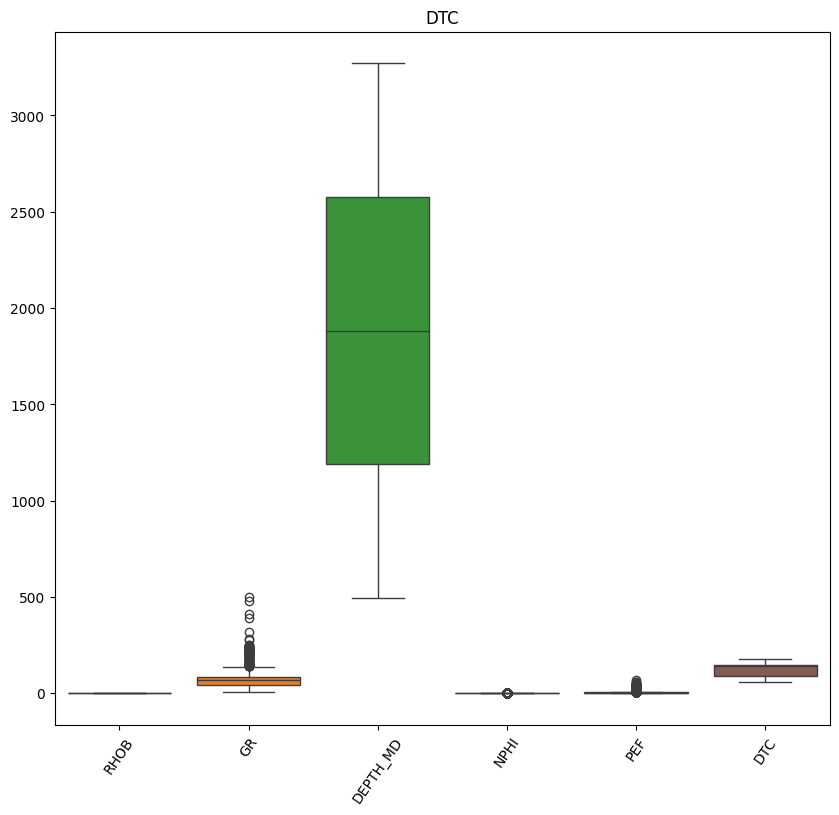

In [10]:
# Boxplot for identifying the outliers

plt.figure(figsize = (10,9))
sns.boxplot(data = df)
plt.xticks(rotation = 55)
plt.title(col)
plt.show()

In [11]:
# Handling the outliers

outliers = ['GR', 'NPHI', 'PEF', 'DTC']
for col in outliers:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower = lower_limit, upper = upper_limit)

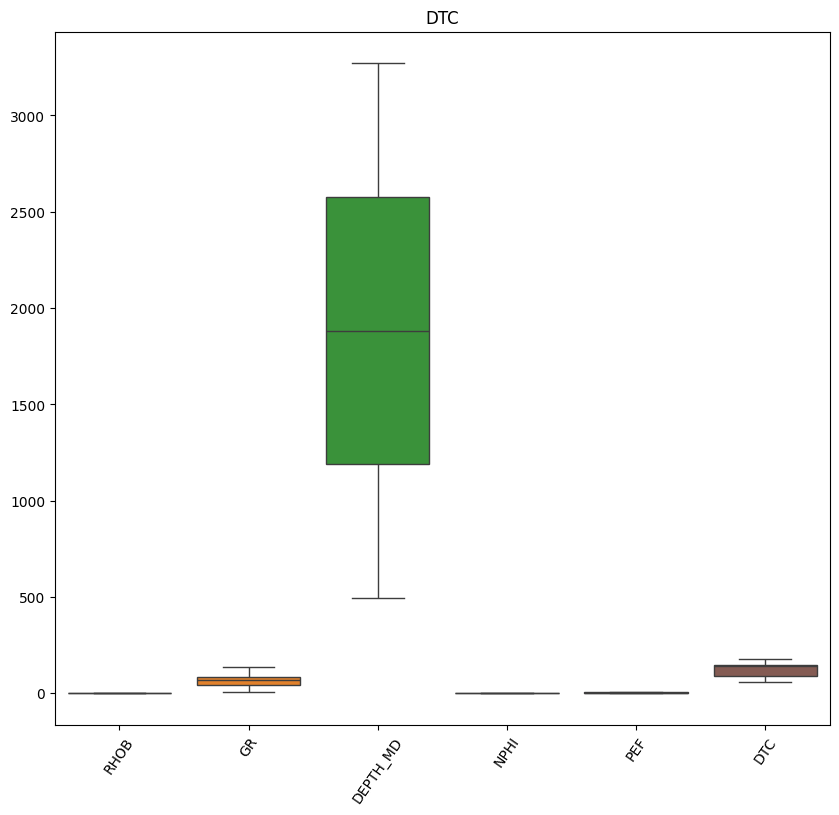

In [12]:
plt.figure(figsize = (10,9))
sns.boxplot(data = df)
plt.xticks(rotation = 55)
plt.title(col)
plt.show()

In [13]:
# Scaling the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [14]:
df_scaled

array([[-0.75999892,  0.64811426, -1.7317211 ,  0.28334567,  2.39586092,
         1.17615254],
       [-0.74116318,  0.61213263, -1.73153155,  0.28334567,  2.39586092,
         1.15888933],
       [-0.71856037,  0.44177414, -1.731342  ,  0.28334567,  2.39586092,
         1.14482729],
       ...,
       [ 1.91742148, -1.5597345 ,  1.73146052, -2.06776996, -0.30788914,
         0.52742176],
       [ 2.10900219, -1.57482184,  1.73165007, -2.08033885, -0.30788914,
         0.52742176],
       [ 2.29234645, -1.6677969 ,  1.73183962, -2.06299932, -0.30788914,
         0.52742176]])

In [15]:
scaled_df = pd.DataFrame(df_scaled, columns = df.columns)

In [16]:
scaled_df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.648114,-1.731721,0.283346,2.395861,1.176153
1,-0.741163,0.612133,-1.731532,0.283346,2.395861,1.158889
2,-0.718560,0.441774,-1.731342,0.283346,2.395861,1.144827
3,-0.734045,0.367235,-1.731152,0.283346,2.395861,1.144036
4,-0.773944,0.323128,-1.730963,0.283346,2.395861,1.143346
...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422


In [17]:
# KMeans Clustering

kmeans = KMeans(n_clusters = 3, random_state = 42)

In [18]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [19]:
pred_clusters = kmeans.predict(df_scaled)

In [20]:
pred_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [21]:
scaled_df['KMeans_Cluster'] = kmeans.labels_

In [22]:
scaled_df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,KMeans_Cluster
0,-0.759999,0.648114,-1.731721,0.283346,2.395861,1.176153,0
1,-0.741163,0.612133,-1.731532,0.283346,2.395861,1.158889,0
2,-0.718560,0.441774,-1.731342,0.283346,2.395861,1.144827,0
3,-0.734045,0.367235,-1.731152,0.283346,2.395861,1.144036,0
4,-0.773944,0.323128,-1.730963,0.283346,2.395861,1.143346,0
...,...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422,1
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422,1
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422,1
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422,1


In [23]:
# Agglomerative Clustering

agg_clustering = AgglomerativeClustering(n_clusters = 3)
scaled_df['Agg_Clustering'] = agg_clustering.fit_predict(scaled_df)

In [24]:
scaled_df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,KMeans_Cluster,Agg_Clustering
0,-0.759999,0.648114,-1.731721,0.283346,2.395861,1.176153,0,1
1,-0.741163,0.612133,-1.731532,0.283346,2.395861,1.158889,0,1
2,-0.718560,0.441774,-1.731342,0.283346,2.395861,1.144827,0,1
3,-0.734045,0.367235,-1.731152,0.283346,2.395861,1.144036,0,1
4,-0.773944,0.323128,-1.730963,0.283346,2.395861,1.143346,0,1
...,...,...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422,1,0
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422,1,0
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422,1,0
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422,1,0


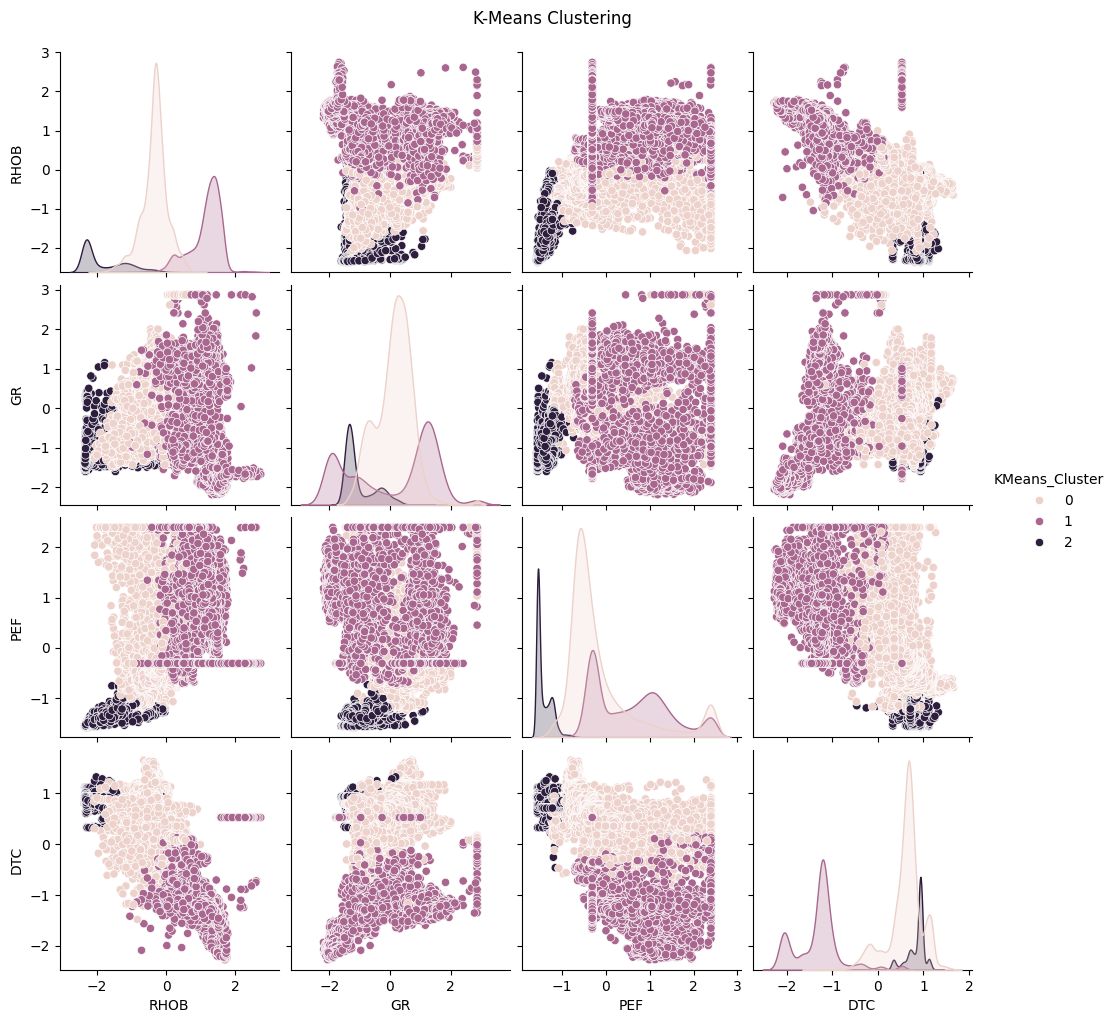

In [25]:
# Visualising the clusters using pairplot

sns.pairplot(scaled_df, hue = 'KMeans_Cluster', vars = ['RHOB', 'GR', 'PEF', 'DTC'])
plt.suptitle('K-Means Clustering', y = 1.02)
plt.show()

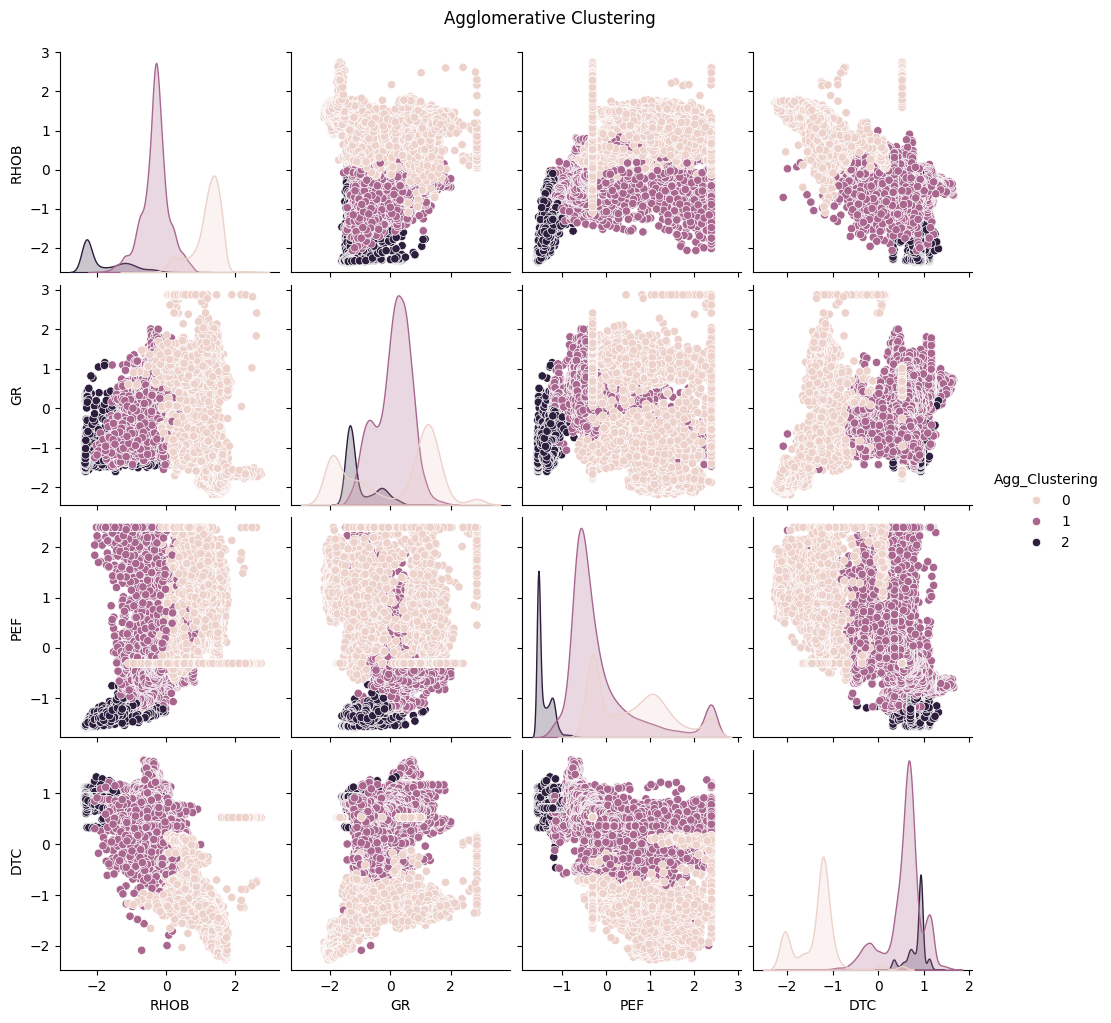

In [26]:
sns.pairplot(scaled_df, hue = 'Agg_Clustering', vars = ['RHOB', 'GR', 'PEF', 'DTC'])
plt.suptitle('Agglomerative Clustering', y = 1.02)
plt.show()

In [31]:
scaled_df[['RHOB', 'GR', 'PEF', 'DTC', 'KMeans_Cluster', 'Agg_Clustering']].head()

,RHOB,GR,PEF,DTC,KMeans_Cluster,Agg_Clustering
0,-0.759999,0.648114,2.395861,1.176153,0,1
1,-0.741163,0.612133,2.395861,1.158889,0,1
2,-0.718560,0.441774,2.395861,1.144827,0,1
3,-0.734045,0.367235,2.395861,1.144036,0,1
4,-0.773944,0.323128,2.395861,1.143346,0,1
